In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

I have bit off more than I can chew with this project. To fully understand the data set and which model I want to use, I will be going back to the basics, learning the stats and maths behind these ML projects and come back to this in due course.

I will be using the 'SUPPORT 2' dataset from the UCI machine learning repository. It's description:
'This dataset comprises 9105 individual critically ill patients across 5 United States medical centers, accessioned throughout 1989-1991 and 1992-1994. Each row concerns hospitalized patient records who met the inclusion and exclusion criteria for nine disease categories: acute respiratory failure, chronic obstructive pulmonary disease, congestive heart failure, liver disease, coma, colon cancer, lung cancer, multiple organ system failure with malignancy, and multiple organ system failure with sepsis. The goal is to determine these patients' 2- and 6-month survival rates based on several physiologic, demographics, and disease severity information. It is an important problem because it addresses the growing national concern over patients' loss of control near the end of life. It enables earlier decisions and planning to reduce the frequency of a mechanical, painful, and prolonged dying process.'

This can be found here: https://archive.ics.uci.edu/dataset/880/support2 

My aim is to create a model to predict length of stay of the patients using several variable factors.

After going through and exploring the data, this data is more suited towards classification predictions, for estimated 2 months and estimated 6 months to live. Since the estimation is only 

In [5]:
pip install ucimlrepo


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
support2 = fetch_ucirepo(id=880) 
  
# data (as pandas dataframes) 
X = support2.data.features 
y = support2.data.targets 
  
# metadata 
print(support2.metadata) 
  
# variable information 
print(support2.variables) 


{'uci_id': 880, 'name': 'SUPPORT2', 'repository_url': 'https://archive.ics.uci.edu/dataset/880/support2', 'data_url': 'https://archive.ics.uci.edu/static/public/880/data.csv', 'abstract': "This dataset comprises 9105 individual critically ill patients across 5 United States medical centers, accessioned throughout 1989-1991 and 1992-1994.\nEach row concerns hospitalized patient records who met the inclusion and exclusion criteria for nine disease categories: acute respiratory failure, chronic obstructive pulmonary disease, congestive heart failure, liver disease, coma, colon cancer, lung cancer, multiple organ system failure with malignancy, and multiple organ system failure with sepsis. The goal is to determine these patients' 2- and 6-month survival rates based on several physiologic, demographics, and disease severity information. \nIt is an important problem because it addresses the growing national concern over patients' loss of control near the end of life. It enables earlier deci

In [7]:
# check column names
print(f"The names of the feature columns are {X.columns} and the names of the target columns are {y.columns}.")

The names of the feature columns are Index(['age', 'sex', 'dzgroup', 'dzclass', 'num.co', 'edu', 'income', 'scoma',
       'charges', 'totcst', 'totmcst', 'avtisst', 'race', 'sps', 'aps',
       'surv2m', 'surv6m', 'hday', 'diabetes', 'dementia', 'ca', 'prg2m',
       'prg6m', 'dnr', 'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp',
       'pafi', 'alb', 'bili', 'crea', 'sod', 'ph', 'glucose', 'bun', 'urine',
       'adlp', 'adls', 'adlsc'],
      dtype='object') and the names of the target columns are Index(['death', 'hospdead', 'sfdm2'], dtype='object').


In [8]:
print(y.sample(10)) # overview of targets

      death  hospdead                sfdm2
5571      1         1     <2 mo. follow-up
3833      1         1     <2 mo. follow-up
4863      0         0  no(M2 and SIP pres)
5730      1         1     <2 mo. follow-up
5779      0         0  adl>=4 (>=5 if sur)
6426      1         1     <2 mo. follow-up
194       1         0  no(M2 and SIP pres)
2975      0         0  no(M2 and SIP pres)
3375      1         0                  NaN
1381      1         0  no(M2 and SIP pres)


In [9]:
print(X) # overview of features

           age     sex            dzgroup             dzclass  num.co   edu  \
0     62.84998    male        Lung Cancer              Cancer       0  11.0   
1     60.33899  female          Cirrhosis  COPD/CHF/Cirrhosis       2  12.0   
2     52.74698  female          Cirrhosis  COPD/CHF/Cirrhosis       2  12.0   
3     42.38498  female        Lung Cancer              Cancer       2  11.0   
4     79.88495  female  ARF/MOSF w/Sepsis            ARF/MOSF       1   NaN   
...        ...     ...                ...                 ...     ...   ...   
9100  66.07300    male  ARF/MOSF w/Sepsis            ARF/MOSF       1   8.0   
9101  55.15399  female               Coma                Coma       1  11.0   
9102  70.38196    male  ARF/MOSF w/Sepsis            ARF/MOSF       1   NaN   
9103  47.01999    male       MOSF w/Malig            ARF/MOSF       1  13.0   
9104  81.53894  female  ARF/MOSF w/Sepsis            ARF/MOSF       1   8.0   

          income  scoma  charges      totcst  ...  

In [10]:
print(y)

      death  hospdead                sfdm2
0         0         0                  NaN
1         1         1     <2 mo. follow-up
2         1         0     <2 mo. follow-up
3         1         0  no(M2 and SIP pres)
4         0         0  no(M2 and SIP pres)
...     ...       ...                  ...
9100      0         0                  NaN
9101      0         0                  NaN
9102      0         0                  NaN
9103      1         1     <2 mo. follow-up
9104      1         0  no(M2 and SIP pres)

[9105 rows x 3 columns]


In [11]:
pip install Jinja2


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [12]:
pd.options.display.max_colwidth = None # displaying the entire description despite the length

testing = support2.variables

# decoding the variable names to figure out which to keep and which aren't relevant. For the ones to keep, a mapping dictionary would be made to make column names more understandable.
testing[['name','description']].style.set_properties(**{'text-align': 'left'}) #align whole description to left

,name,description
0,id,None
1,age,Age of the patients in years
2,death,Death at any time up to National Death Index (NDI) data on 31 of December of 1994. Some patients are discharged before the end of the study and are not followed up. The authors looked up the information about death.
3,sex,"Gender of the patient. Listed values are {male, female}."
4,hospdead,Death in hospital
5,slos,Days from Study Entry to Discharge
6,d.time,Days of follow-up
7,dzgroup,"The patient's disease sub category amogst ARF/MOSF w/Sepsis, CHF, COPD, Cirrhosis, Colon Cancer, Coma, Lung Cancer, MOSF w/Malig."
8,dzclass,"The patient's disease category amongst ""ARF/MOSF"", ""COPD/CHF/Cirrhosis"", ""Cancer"", ""Coma""."
9,num.co,The number of simultaneous diseases (or comorbidities) exhibited by the patient. Values are ordinal with higher values indicating worse condition and chances of survival.


In [13]:
y.sample(10)

,death,hospdead,sfdm2
4745,1,1,<2 mo. follow-up
3734,1,1,<2 mo. follow-up
8523,1,1,<2 mo. follow-up
7991,0,0,no(M2 and SIP pres)
2995,1,0,no(M2 and SIP pres)
5559,0,0,adl>=4 (>=5 if sur)
5470,0,0,adl>=4 (>=5 if sur)
7720,0,0,NaN
2371,0,0,no(M2 and SIP pres)
5977,1,0,NaN


In [14]:
X.sample(10)

,age,sex,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,...,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,adlsc
8848,67.84399,female,Coma,Coma,0,16.0,>$50k,94.0,34959.000,24302.5469,...,NaN,0.699951,138.0,7.429688,112.0,6.0,3975.0,NaN,0.0,0.000000
2304,85.06195,female,COPD,COPD/CHF/Cirrhosis,3,12.0,under $11k,0.0,38155.000,26735.8125,...,0.500000,0.599976,142.0,7.479492,NaN,NaN,NaN,6.0,NaN,4.527397
1036,49.16898,male,ARF/MOSF w/Sepsis,ARF/MOSF,8,13.0,$25-$50k,0.0,59761.000,18474.4688,...,NaN,6.799805,130.0,7.349609,NaN,43.0,0.0,5.0,3.0,3.000000
6290,50.32397,female,COPD,COPD/CHF/Cirrhosis,2,NaN,NaN,9.0,70501.000,59879.0938,...,0.399963,1.099854,132.0,7.349609,NaN,NaN,NaN,NaN,NaN,3.070312
4107,69.99896,female,ARF/MOSF w/Sepsis,ARF/MOSF,0,11.0,under $11k,26.0,110167.938,70867.0000,...,1.000000,0.500000,133.0,7.459961,NaN,NaN,NaN,0.0,1.0,1.000000
1513,45.27597,female,CHF,COPD/CHF/Cirrhosis,1,NaN,NaN,0.0,76227.000,28078.3281,...,2.099609,1.699951,134.0,7.509766,NaN,30.0,1651.0,NaN,NaN,3.168945
9042,80.12897,male,Cirrhosis,COPD/CHF/Cirrhosis,1,8.0,NaN,9.0,6034.000,4013.2930,...,1.099854,1.099854,142.0,7.379883,126.0,45.0,NaN,NaN,5.0,5.000000
5926,57.46997,female,CHF,COPD/CHF/Cirrhosis,4,NaN,NaN,0.0,7984.000,6035.1250,...,1.899902,0.899902,130.0,7.459961,NaN,NaN,NaN,NaN,2.0,2.000000
3336,76.90094,female,ARF/MOSF w/Sepsis,ARF/MOSF,0,14.0,NaN,41.0,NaN,NaN,...,2.199707,0.799927,129.0,7.419922,NaN,NaN,NaN,NaN,7.0,7.000000
1542,77.06494,male,ARF/MOSF w/Sepsis,ARF/MOSF,2,NaN,NaN,26.0,26899.000,11858.2734,...,NaN,0.799927,135.0,7.469727,92.0,19.0,2200.0,NaN,NaN,5.412109


Print out the summary statistics. There are currently two dataframes, X which is the features, and y which is the targets. 
I will concatonate these together to check for missing values and

In [15]:
# Assuming `X` is your features DataFrame and `y` is your target(s) DataFrame
support_df = pd.concat([X, y], axis=1)
support_df

,age,sex,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,...,ph,glucose,bun,urine,adlp,adls,adlsc,death,hospdead,sfdm2
0,62.84998,male,Lung Cancer,Cancer,0,11.0,$11-$25k,0.0,9715.0,NaN,...,7.459961,NaN,NaN,NaN,7.0,7.0,7.000000,0,0,NaN
1,60.33899,female,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,$11-$25k,44.0,34496.0,NaN,...,7.250000,NaN,NaN,NaN,NaN,1.0,1.000000,1,1,<2 mo. follow-up
2,52.74698,female,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,under $11k,0.0,41094.0,NaN,...,7.459961,NaN,NaN,NaN,1.0,0.0,0.000000,1,0,<2 mo. follow-up
3,42.38498,female,Lung Cancer,Cancer,2,11.0,under $11k,0.0,3075.0,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.000000,1,0,no(M2 and SIP pres)
4,79.88495,female,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,NaN,26.0,50127.0,NaN,...,7.509766,NaN,NaN,NaN,NaN,2.0,2.000000,0,0,no(M2 and SIP pres)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9100,66.07300,male,ARF/MOSF w/Sepsis,ARF/MOSF,1,8.0,NaN,0.0,52870.0,34329.3125,...,7.459961,188.0,21.0,NaN,NaN,0.0,0.000000,0,0,NaN
9101,55.15399,female,Coma,Coma,1,11.0,NaN,41.0,35377.0,23558.5000,...,7.289062,190.0,49.0,0.0,NaN,0.0,0.000000,0,0,NaN
9102,70.38196,male,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,NaN,0.0,46564.0,31409.0156,...,7.379883,189.0,60.0,3900.0,NaN,NaN,2.525391,0,0,NaN
9103,47.01999,male,MOSF w/Malig,ARF/MOSF,1,13.0,NaN,0.0,58439.0,NaN,...,7.469727,246.0,55.0,NaN,NaN,0.0,0.000000,1,1,<2 mo. follow-up


In [16]:
support_df_description = support_df.describe()
print(support_df_description)

print('\n')

# Print DataFrame information
support_df_info = support_df.info()
print(support_df_info)

print('\n')

# Inspect missing values in the dataset
support_df_missing_values = support_df.isnull().sum() # alt .values.any() for 'True' or 'False'

               age       num.co          edu        scoma       charges  \
count  9105.000000  9105.000000  7471.000000  9104.000000  8.933000e+03   
mean     62.650823     1.868644    11.747691    12.058546  5.999579e+04   
std      15.593710     1.344409     3.447743    24.636694  1.026488e+05   
min      18.041990     0.000000     0.000000     0.000000  1.169000e+03   
25%      52.797000     1.000000    10.000000     0.000000  9.740000e+03   
50%      64.856990     2.000000    12.000000     0.000000  2.502400e+04   
75%      73.998960     3.000000    14.000000     9.000000  6.459800e+04   
max     101.847960     9.000000    31.000000   100.000000  1.435423e+06   

              totcst        totmcst      avtisst          sps          aps  \
count    8217.000000    5630.000000  9023.000000  9104.000000  9104.000000   
mean    30825.867768   28828.877838    22.610928    25.525872    37.597979   
std     45780.820986   43604.261932    13.233248     9.899377    19.903852   
min         

In [17]:
print(support_df_missing_values)

age            0
sex            0
dzgroup        0
dzclass        0
num.co         0
edu         1634
income      2982
scoma          1
charges      172
totcst       888
totmcst     3475
avtisst       82
race          42
sps            1
aps            1
surv2m         1
surv6m         1
hday           0
diabetes       0
dementia       0
ca             0
prg2m       1649
prg6m       1633
dnr           30
dnrday        30
meanbp         1
wblc         212
hrt            1
resp           1
temp           1
pafi        2325
alb         3372
bili        2601
crea          67
sod            1
ph          2284
glucose     4500
bun         4352
urine       4862
adlp        5641
adls        2867
adlsc          0
death          0
hospdead       0
sfdm2       1400
dtype: int64


Time to input some missing values as recommended by the dataset information on the main page. This includes:
- Serum albumin (alb)	3.5
- PaO2/FiO2 ratio (pafi) 	333.3
- Bilirubin (bili)	1.01
- Creatinine (crea)	1.01
- bun	6.51
- White blood count (wblc)	9 (thousands)
- Urine output (urine)	2502
There are 159 patients surviving 2 months for whom there were no patient or surrogate interviews. These patients have missing sfdm2.

In [18]:
# convert the df to csv to be able to explore and find erronous values
support_df.to_csv('dirty_.csv')

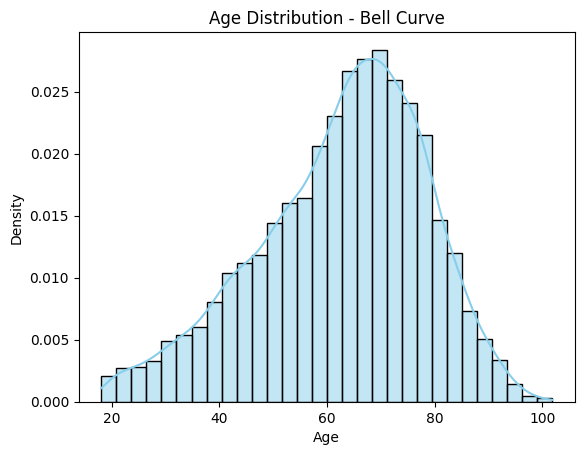

In [19]:
sns.histplot(support_df['age'], kde=True, bins=30, color='skyblue', stat='density')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution - Bell Curve')
plt.show()

In [35]:
print(support_df.columns)

Index(['age', 'sex', 'dzgroup', 'dzclass', 'num.co', 'edu', 'income', 'scoma',
       'charges', 'totcst', 'totmcst', 'avtisst', 'race', 'sps', 'aps',
       'surv2m', 'surv6m', 'hday', 'diabetes', 'dementia', 'ca', 'prg2m',
       'prg6m', 'dnr', 'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp',
       'pafi', 'alb', 'bili', 'crea', 'sod', 'ph', 'glucose', 'bun', 'urine',
       'adlp', 'adls', 'adlsc', 'death', 'hospdead', 'sfdm2'],
      dtype='object')
